# YAHOO FINANCE ANALYSIS

## Moving Average Method

In [ ]:
https://www.youtube.com/watch?v=jB6CNUrgJ6s

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go

In [125]:
apple_df=yf.download("AAPL",start="2017-01-01",progress=False)   #,end = '2019-01-01'
apple_df.index=pd.to_datetime(apple_df.index)
apple_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.332472,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.301882,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.440716,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.746639,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,28.000778,134247600
...,...,...,...,...,...,...
2022-01-10,169.080002,172.500000,168.169998,172.190002,172.190002,106765600
2022-01-11,172.320007,175.179993,170.820007,175.080002,175.080002,76138300
2022-01-12,176.119995,177.179993,174.820007,175.529999,175.529999,74805200


In [126]:
close_app=apple_df.iloc[:len(apple_df)//2,3]
close_app.head()

Date
2017-01-03    29.037500
2017-01-04    29.004999
2017-01-05    29.152500
2017-01-06    29.477501
2017-01-09    29.747499
Name: Close, dtype: float64

In [127]:
rolling_5 = close_app.rolling(window=5).mean()
rolling_14 = close_app.rolling(window=14).mean()
rolling_21 = close_app.rolling(window=21).mean()


In [128]:
df_final=pd.concat([close_app,rolling_5,rolling_14,rolling_21], axis=1)
df_final.columns=["Close", "short", "mid", "long"]
df_final.head()

,Close,short,mid,long
Date,,,,
2017-01-03,29.037500,NaN,NaN,NaN
2017-01-04,29.004999,NaN,NaN,NaN
2017-01-05,29.152500,NaN,NaN,NaN
2017-01-06,29.477501,NaN,NaN,NaN
2017-01-09,29.747499,29.284,NaN,NaN


In [129]:
df_final.dropna(axis=0,inplace=True)
df_final

,Close,short,mid,long
Date,,,,
2017-02-01,32.187500,30.7810,30.278750,30.001786
2017-02-02,32.132500,31.1105,30.444464,30.149167
2017-02-03,32.270000,31.4670,30.623750,30.304643
2017-02-06,32.572498,31.9000,30.807500,30.467500
2017-02-07,32.882500,32.4090,31.013571,30.629643
...,...,...,...,...
2019-07-05,51.057499,50.5420,49.874643,49.247857
2019-07-08,50.005001,50.6470,49.984107,49.424048
2019-07-09,50.310001,50.6315,50.033929,49.556072


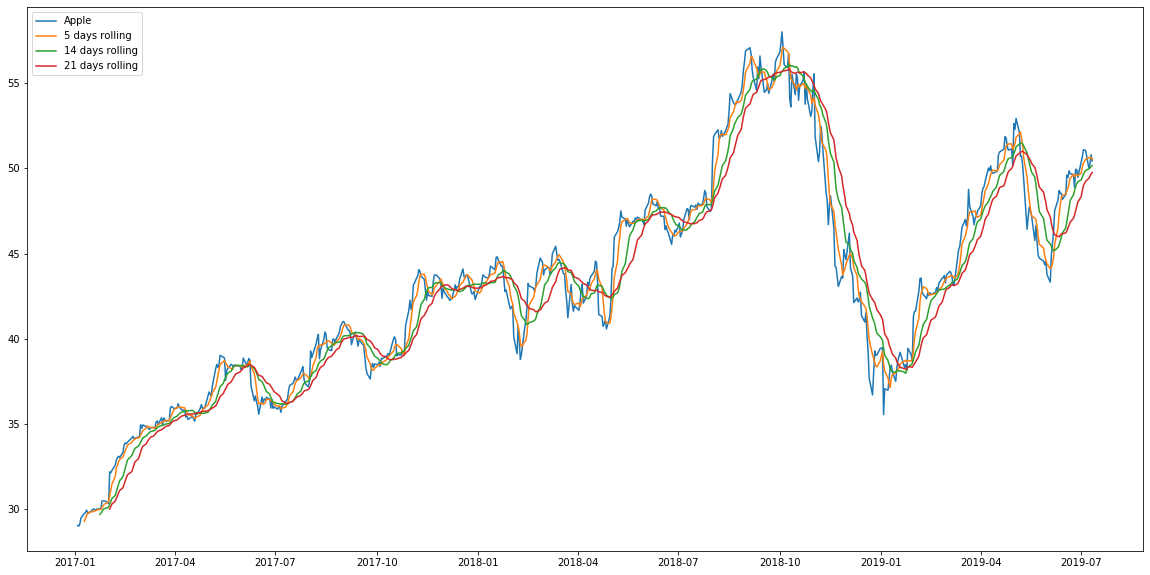

In [130]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(close_app.index, close_app, label="Apple")
ax.plot(rolling_5.index, rolling_5, label="5 days rolling")
ax.plot(rolling_14.index, rolling_14, label="14 days rolling")
ax.plot(rolling_21.index, rolling_21, label="21 days rolling")
ax.legend(loc="upper left")

In [131]:
df_final["short"]-df_final["mid"]

Date
2017-02-01    0.502250
2017-02-02    0.666035
2017-02-03    0.843250
2017-02-06    1.092500
2017-02-07    1.395428
                ...   
2019-07-05    0.667357
2019-07-08    0.662893
2019-07-09    0.597571
2019-07-10    0.526857
2019-07-11    0.352964
Length: 614, dtype: float64

In [132]:
def buy_sell(data, perc=50):
    buy_sell=[]
    buy_signal=[]
    sell_signal=[]
    flag = 42
    
    sm=np.abs(np.percentile(np.array(data["short"]-data["mid"]),perc))
    sl=np.abs(np.percentile(np.array(data["short"]-data["long"]),perc))
    
    for i in range(0,len(data)):
        if(data["short"][i] > data["mid"][i]+sm) & (data["short"][i] > data["long"][i]+sl):
            buy_signal.append(np.nan)
            if flag != 1:
                sell_signal.append(data["Close"][i])
                buy_sell.append(data["Close"][i])
                flag = 1
            else:
                sell_signal.append(np.nan)
        elif (data["short"][i] < data["mid"][i]-sm) & (data["short"][i] < data["long"][i]-sl):
            sell_signal.append(np.nan)
            if flag != 0:
                buy_signal.append(data["Close"][i])
                buy_sell.append(-data["Close"][i])
                flag = 0
            else:
                buy_signal.append(np.nan)
        else:
            buy_sell.append(np.nan)
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)
            
    operations = np.array(buy_sell)
    operations = operations[~np.isnan(operations)]
    
    neg=0
    pos=0

    for i in range(len(operations)):
        if operations[i]<0:
            neg=i
            break

    for i in range(1,len(operations)):
        if operations[-i]>0 and i==1:
            pos=len(operations)
            break
        elif operations[-i]>0 and i==2:
            pos=-1
            break

    operations=operations[neg:pos]
    PL=np.sum(operations)
    
    return (buy_signal,sell_signal, PL)



In [133]:
m=buy_sell(df_final)
df_final["BUY"]=m[0]
df_final["SELL"]=m[1]

In [135]:
m

([nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  36.647499084472656,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan

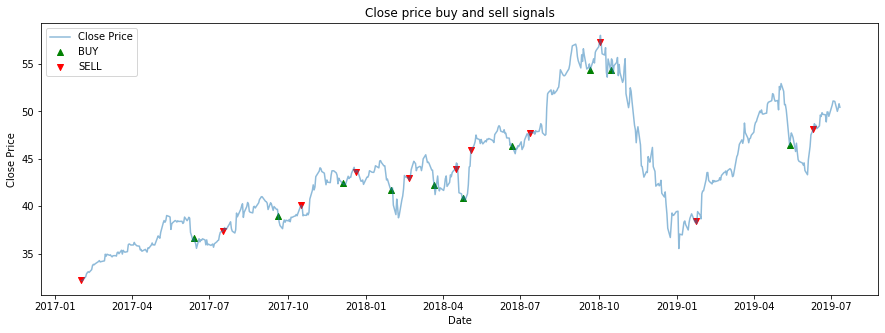

In [136]:
plt.figure(figsize=(15,5))
plt.scatter(df_final.index, df_final["BUY"],color="green", label="BUY", marker="^", alpha=1 )
plt.scatter(df_final.index, df_final["SELL"],color="red", label="SELL", marker="v", alpha=1 )
plt.plot(df_final["Close"], label="Close Price", alpha=0.5)
plt.title('Close price buy and sell signals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc="upper left")
plt.show()

In [139]:
df_final.index[1]-df_final.index[-1]

Timedelta('-889 days +00:00:00')

In [140]:
# Total profit
m[2]

1.1800003051757812